**Assignment 7 - Solutions**

In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 

%matplotlib inline

In [145]:
df = pd.read_csv('Auto.csv',na_values=["?"])
mean = df['horsepower'].mean()
df['horsepower'].fillna(mean, inplace = True)

In [146]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


(a) Create a binary variable, $mpg01$, that contains a 1 if $mpg$ contains
a value above its median, and a 0 if $mpg$ contains a value below
its median. You can compute the median using the $median()$
function. Note you may find it helpful to use a data frame
to create a single data set containing both $mpg01$ and
the other 'Auto' variables.

In [147]:
df['mpg01']= np.where(df['mpg'] > df['mpg'].median(), 1, 0)

In [148]:
df.head(100)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom,0
96,13.0,8,360.0,175.0,3821,11.0,73,1,amc ambassador brougham,0
97,18.0,6,225.0,105.0,3121,16.5,73,1,plymouth valiant,0
98,16.0,6,250.0,100.0,3278,18.0,73,1,chevrolet nova custom,0


In [149]:
df.head(100)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom,0
96,13.0,8,360.0,175.0,3821,11.0,73,1,amc ambassador brougham,0
97,18.0,6,225.0,105.0,3121,16.5,73,1,plymouth valiant,0
98,16.0,6,250.0,100.0,3278,18.0,73,1,chevrolet nova custom,0


(b) Explore the data graphically in order to investigate the association
between $mpg01$ and the other features. Which of the other
features seem most likely to be useful in predicting $mpg01$? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.

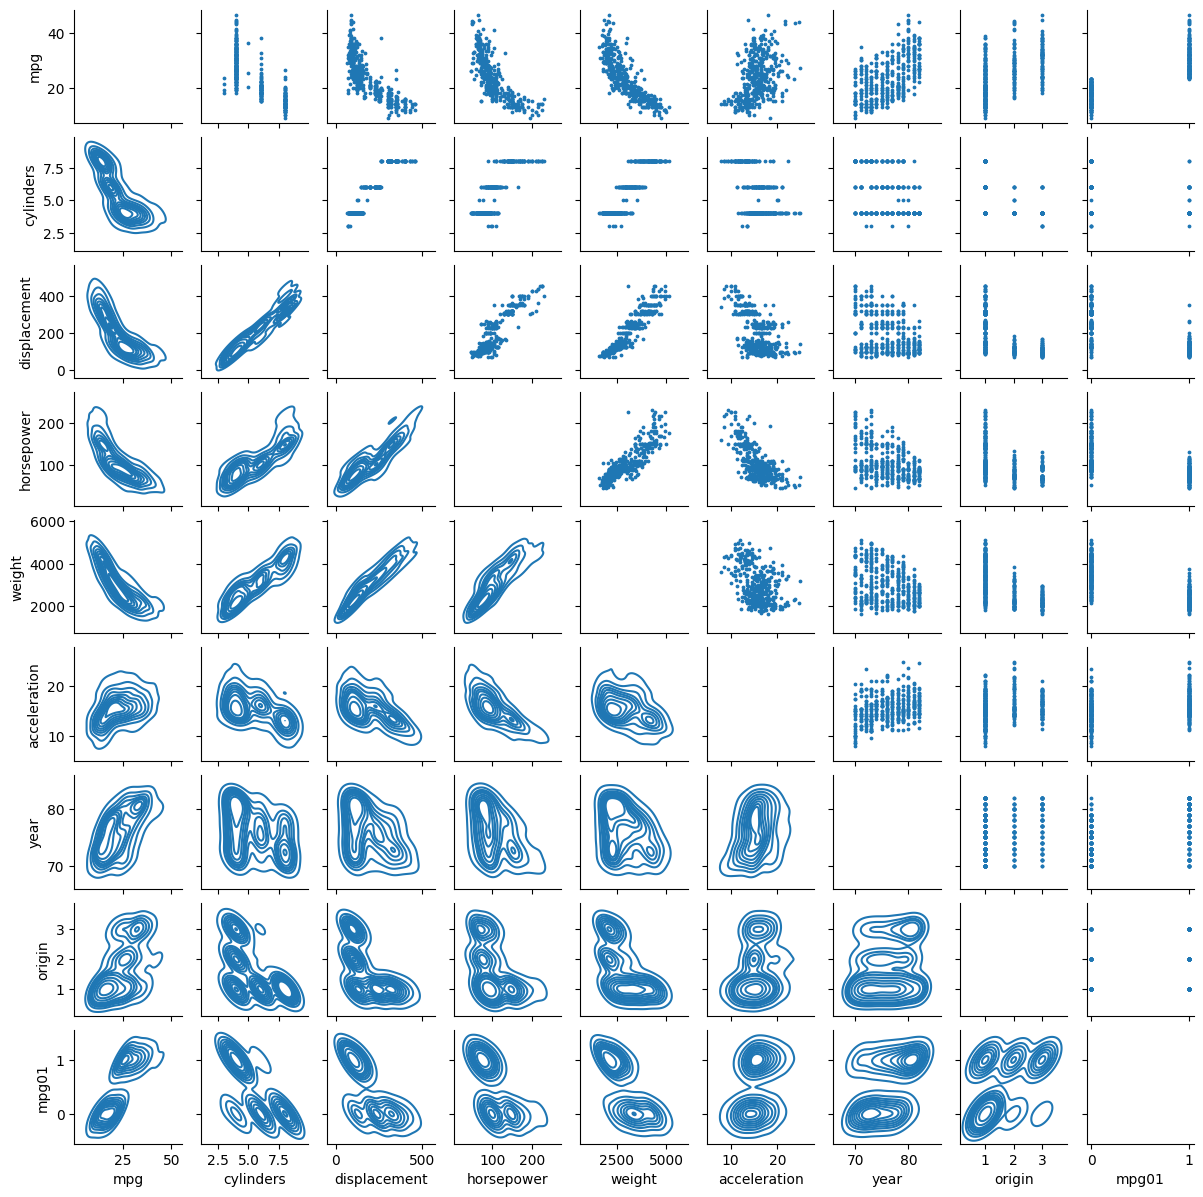

In [150]:
# import matplotlib.pyplot as plt
# import matplotlib.colors as colors
# import matplotlib.cm as cm

# coolwarm = plt.get_cmap('Green')

g = sns.PairGrid(df, height=2)
g.map_upper(plt.scatter, s=3)

g.map_lower(sns.kdeplot)
# g.map_lower(sns.kdeplot, cmap=coolwarm)
# g.map_lower(sns.kdeplot, cmap='coolwarm')
g.fig.set_size_inches(12, 12)

In [151]:
df.corr()

/var/folders/06/gmp4cfpd1kn490jzvs864zh00000gn/T/ipykernel_32713/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.776260,-0.804443,-0.771441,-0.831739,0.422297,0.581469,0.563698,0.838239
cylinders,-0.776260,1.000000,0.950920,0.839715,0.897017,-0.504061,-0.346717,-0.564972,-0.740327
displacement,-0.804443,0.950920,1.000000,0.893833,0.933104,-0.544162,-0.369804,-0.610664,-0.738607
horsepower,-0.771441,0.839715,0.893833,1.000000,0.860581,-0.687039,-0.413022,-0.453962,-0.644938
weight,-0.831739,0.897017,0.933104,0.860581,1.000000,-0.419502,-0.307900,-0.581265,-0.745734
acceleration,0.422297,-0.504061,-0.544162,-0.687039,-0.419502,1.000000,0.282901,0.210084,0.322629
year,0.581469,-0.346717,-0.369804,-0.413022,-0.307900,0.282901,1.000000,0.184314,0.454108
origin,0.563698,-0.564972,-0.610664,-0.453962,-0.581265,0.210084,0.184314,1.000000,0.511393
mpg01,0.838239,-0.740327,-0.738607,-0.644938,-0.745734,0.322629,0.454108,0.511393,1.000000


(c) Split the data into a training set and a test set.

In [152]:
x = df[['cylinders', 'displacement', 'weight']].values
y = df['mpg01'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

(d) Perform LDA on the training data in order to predict $mpg01$ using the variables that seemed most associated with $mpg01$ in (b). What is the test error of the model obtained?

In [153]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
accuracy_score(y_test, lda.predict(x_test))

0.89

(e) Perform QDA on the training data in order to predict $mpg01$
using the variables that seemed most associated with $mpg01$ in
(b). What is the test error of the model obtained?

In [154]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)
accuracy_score(y_test, qda.predict(x_test))

0.88

(f) Perform logistic regression on the training data in order to predict
$mpg01$ using the variables that seemed most associated with
$mpg01$ in (b). What is the test error of the model obtained?

In [155]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
accuracy_score(y_test, lr.predict(x_test))

0.87

(g) Perform KNN on the training data, with several values of $K$, in
order to predict $mpg01$. Use only the variables that seemed most
associated with $mpg01$ in (b). What test errors do you obtain?
Which value of $K$ seems to perform the best on this data set?

In [156]:
for K in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(x_train, y_train)
    acc = accuracy_score(y_test, knn.predict(x_test))
    print('K = {:3}, accuracy = {:.4f}'.format(K, acc))

K =   1, accuracy = 0.9000
K =   2, accuracy = 0.8800
K =   3, accuracy = 0.9100
K =   4, accuracy = 0.8900
K =   5, accuracy = 0.8700
K =   6, accuracy = 0.8900
K =   7, accuracy = 0.9000
K =   8, accuracy = 0.9100
K =   9, accuracy = 0.8900
K =  10, accuracy = 0.8900
K =  11, accuracy = 0.8900
K =  12, accuracy = 0.8800
K =  13, accuracy = 0.8900
K =  14, accuracy = 0.8900
K =  15, accuracy = 0.8900
K =  16, accuracy = 0.8900
K =  17, accuracy = 0.8700
K =  18, accuracy = 0.8900
K =  19, accuracy = 0.8800
K =  20, accuracy = 0.8900
K =  21, accuracy = 0.8900
K =  22, accuracy = 0.8900
K =  23, accuracy = 0.8800
K =  24, accuracy = 0.8800
K =  25, accuracy = 0.8800
K =  26, accuracy = 0.8800
K =  27, accuracy = 0.8800
K =  28, accuracy = 0.8800
K =  29, accuracy = 0.8800
K =  30, accuracy = 0.8800
K =  31, accuracy = 0.8800
K =  32, accuracy = 0.8900
K =  33, accuracy = 0.8900
K =  34, accuracy = 0.8900
K =  35, accuracy = 0.8700
K =  36, accuracy = 0.8800
K =  37, accuracy = 0.8700
K